<a href="https://colab.research.google.com/github/JhonasVoc/Estatistica_Python/blob/main/frequ%C3%AAncia_e_medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
dados = pd.read_csv("dados.csv")

In [7]:
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


# Distribuição de Frequência para variáveis *qualitativas*

Método 1


In [8]:
dados.Sexo.value_counts()

0    24376
1    10922
Name: Sexo, dtype: int64

In [9]:
dados.Sexo.value_counts(normalize =True)

0    0.690577
1    0.309423
Name: Sexo, dtype: float64

In [10]:
percentual = dados.Sexo.value_counts(normalize =True)* 100

In [11]:
frequencia = dados["Sexo"].value_counts()

In [12]:
dist_frequencia_qualitativas = pd.DataFrame({'Frequência ':frequencia,'Porcentagem':percentual})

In [13]:
dist_frequencia_qualitativas

,Frequência,Porcentagem
0,24376,69.057737
1,10922,30.942263


In [14]:
dist_frequencia_qualitativas.rename(index ={0:'Masculino',1 :'Feminino '}) # tu da rename com um dicionario

,Frequência,Porcentagem
Masculino,24376,69.057737
Feminino,10922,30.942263


In [15]:
dist_frequencia_qualitativas.rename(index ={0:'Masculino',1 :'Feminino '},inplace = True)

In [16]:
dist_frequencia_qualitativas

,Frequência,Porcentagem
Masculino,24376,69.057737
Feminino,10922,30.942263


In [17]:
dist_frequencia_qualitativas.rename_axis('Sexo',axis ='columns', inplace = True)

In [18]:
dist_frequencia_qualitativas

Sexo,Frequência,Porcentagem
Masculino,24376,69.057737
Feminino,10922,30.942263


#Frequencia e distribuição com outras variáveis:

In [19]:
dados.UF.value_counts()

29    5717
15    4449
26    3820
31    3480
23    3359
13    2206
21    1787
11    1537
17    1306
28    1287
25    1274
22    1211
24     973
12     937
27     903
14     540
16     512
Name: UF, dtype: int64

In [20]:
dados.UF.value_counts(normalize= True)

29    0.161964
15    0.126041
26    0.108221
31    0.098589
23    0.095161
13    0.062496
21    0.050626
11    0.043544
17    0.036999
28    0.036461
25    0.036093
22    0.034308
24    0.027565
12    0.026545
27    0.025582
14    0.015298
16    0.014505
Name: UF, dtype: float64

In [21]:
dados["Cor"].value_counts()

8    21756
2     8641
4     4574
0      248
6       79
Name: Cor, dtype: int64

In [22]:
dados.Cor.value_counts(normalize= True)

8    0.616352
2    0.244801
4    0.129582
0    0.007026
6    0.002238
Name: Cor, dtype: float64

Método 2

In [23]:
#nós conseguimos ver na descrição dos dados

In [24]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [25]:
frequencia = pd.crosstab(dados.Sexo,dados.Cor) #cruzamento das tabeles

In [26]:
frequencia.rename(index = sexo,inplace = True) #conectando o diciconario ns linhas
frequencia.rename(columns = cor,inplace = True) #conectando o dicionario nas colunas
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,187,6039,3008,41,15101
Feminino,61,2602,1566,38,6655


In [27]:
percentual  = pd.crosstab(dados.Sexo,dados.Cor,normalize = True) *100
percentual.rename(index = sexo, inplace = True) #conectando o diciconario ns linhas
percentual.rename(columns= cor, inplace = True)#conectando o dicionario nas colunas
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.529775,17.108618,8.521729,0.116154,42.781461
Feminino,0.172814,7.371522,4.436512,0.107655,18.853759


In [28]:
# posso usar agg func para agreggar, tem que colocar um método e uma variável

In [29]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,891.529412,2246.350058,1337.413231,4303.951220,1410.447719
Feminino,825.098361,1764.718294,966.537676,1327.052632,1055.995943


Variáveis quantitativas:

In [30]:
dados.Renda.min()


0

In [31]:
dados.Renda.max() # descobrind o ultimo número para delimitar as classes

200000

In [32]:
classes =[0, 1576,3152,7880,15760,200000]

In [33]:
labels =['E','D','C','B','A']

#Tabela de Frêquencia

In [34]:
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


In [35]:
pd.cut(x = dados.Renda, # bins é o critério
       bins = classes,
       labels = labels,
       include_lowest =True) # incluo o menor número no itnervalo

0        E
1        E
2        E
3        C
4        E
        ..
35293    E
35294    E
35295    E
35296    E
35297    E
Name: Renda, Length: 35298, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [36]:
pd.value_counts(pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest =True))

E    27040
D     5096
C     2433
B      594
A      135
Name: Renda, dtype: int64

In [37]:
frequencia = pd.value_counts(pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest =True))
frequencia

E    27040
D     5096
C     2433
B      594
A      135
Name: Renda, dtype: int64

In [38]:
percentual = pd.value_counts(pd.cut(x = dados.Renda,
       bins = classes,
       labels = labels,
       include_lowest =True),normalize = True
)
percentual

E    0.766049
D    0.144371
C    0.068927
B    0.016828
A    0.003825
Name: Renda, dtype: float64

In [39]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,27040,0.766049
D,5096,0.144371
C,2433,0.068927
B,594,0.016828
A,135,0.003825


In [40]:
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,135,0.003825
B,594,0.016828
C,2433,0.068927
D,5096,0.144371
E,27040,0.766049


#Exercicio

In [41]:
classes1= [dados.Altura.min(),1.65,1.75,dados.Altura.max()]
labels1=['1 - Baixa','2 - Média','3-Alta']
frequencia1= pd.value_counts(pd.cut(x =dados.Altura,
                                   bins=classes1,
                                   labels=labels1,
                                   include_lowest= True)
                            )
percentual1= pd.value_counts(pd.cut(x =dados.Altura,
                                    bins = classes1,
                                    labels = labels1,
                                    include_lowest= True),
                             normalize =True)* 100
dist_frequencia_quantitativas1 = pd.DataFrame(
    {'Frqu6encia':frequencia1, 'Porncentagem':percentual1}
)
dist_frequencia_quantitativas1.rename_axis('Estaturas',axis = 'columns',inplace = True)
dist_frequencia_quantitativas1.sort_index(ascending = True, inplace = True)

dist_frequencia_quantitativas1

Estaturas,Frqu6encia,Porncentagem
1 - Baixa,9474,26.840048
2 - Média,16524,46.812851
3-Alta,9300,26.347102


#Distribuição de frequência para variáveis quantitativas(classes de amplitude fixa)

In [42]:
import numpy as np

Regra de Sturges

 k = 1 + (10/3 log₁₀ n)

In [43]:
n = dados.shape[0]
n

35298

In [44]:
k = 1+(10/3) * np.log10(n)
k

16.159166995903632

In [45]:
 k = int(k.round(0))
 k

16

In [46]:
pd.value_counts(
    pd.cut(
        x= dados.Renda,
        bins = 17, #cria 17 classes com mesma amplitude
        include_lowest = True
    )
                 )

(-200.001, 11764.706]       35009
(11764.706, 23529.412]        228
(23529.412, 35294.118]         49
(35294.118, 47058.824]          5
(47058.824, 58823.529]          4
(94117.647, 105882.353]         1
(58823.529, 70588.235]          1
(188235.294, 200000.0]          1
(70588.235, 82352.941]          0
(82352.941, 94117.647]          0
(105882.353, 117647.059]        0
(117647.059, 129411.765]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
Name: Renda, dtype: int64

In [47]:
# aqui nós vamos ver a ordenação nas classes não do count
pd.value_counts(
    pd.cut(
        x= dados.Renda,
        bins = 17, #cria 17 classes com mesma amplitude
        include_lowest = True
    ), sort = False
                 )

(-200.001, 11764.706]       35009
(11764.706, 23529.412]        228
(23529.412, 35294.118]         49
(35294.118, 47058.824]          5
(47058.824, 58823.529]          4
(58823.529, 70588.235]          1
(70588.235, 82352.941]          0
(82352.941, 94117.647]          0
(94117.647, 105882.353]         1
(105882.353, 117647.059]        0
(117647.059, 129411.765]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          1
Name: Renda, dtype: int64

#Criando a tabela de fr6encias com as 17 classes

In [48]:
frequencia2 = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
)

In [49]:
percentual2 = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False,
    normalize = True
)
percentual

E    0.766049
D    0.144371
C    0.068927
B    0.016828
A    0.003825
Name: Renda, dtype: float64

In [50]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia2, 'Porcentagem (%)': percentual2}
)
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",35009,0.991813
"(11764.706, 23529.412]",228,0.006459
"(23529.412, 35294.118]",49,0.001388
"(35294.118, 47058.824]",5,0.000142
"(47058.824, 58823.529]",4,0.000113
"(58823.529, 70588.235]",1,0.000028
"(70588.235, 82352.941]",0,0.000000
"(82352.941, 94117.647]",0,0.000000
"(94117.647, 105882.353]",1,0.000028
"(105882.353, 117647.059]",0,0.000000


#Realizando uma representação gráfica de distribuição e frequência


In [51]:
import seaborn as sns

<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Metros', ylabel='Count'>

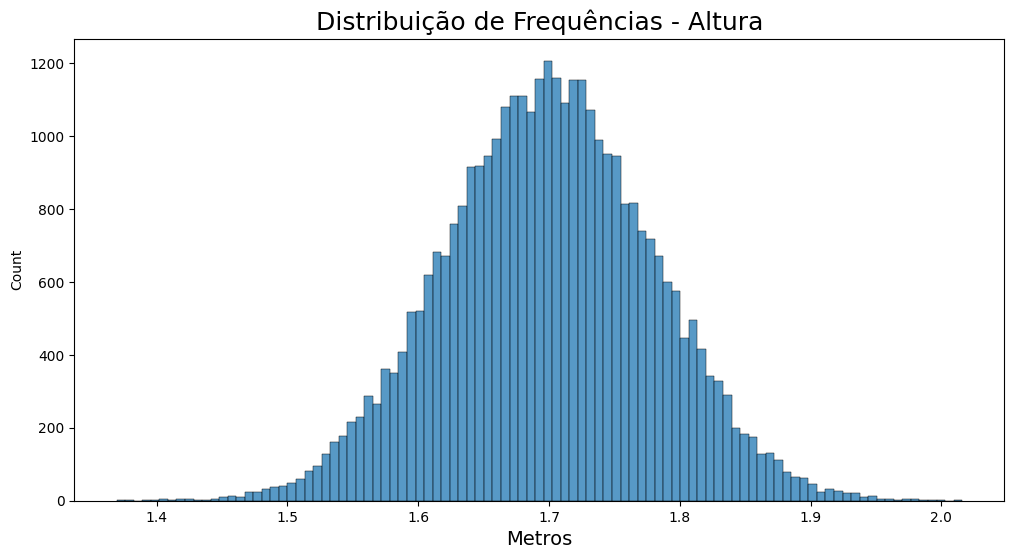

In [52]:
ax = sns.histplot(dados.Altura, kde = False) #kde é aprametro de função densidade

ax.figure.set_size_inches(12, 6) #tamanho
ax.set_title('Distribuição de Frequências - Altura', fontsize=18) #titulo
ax.set_xlabel('Metros', fontsize=14) # label inferior
ax

<Axes: title={'center': 'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Count'>

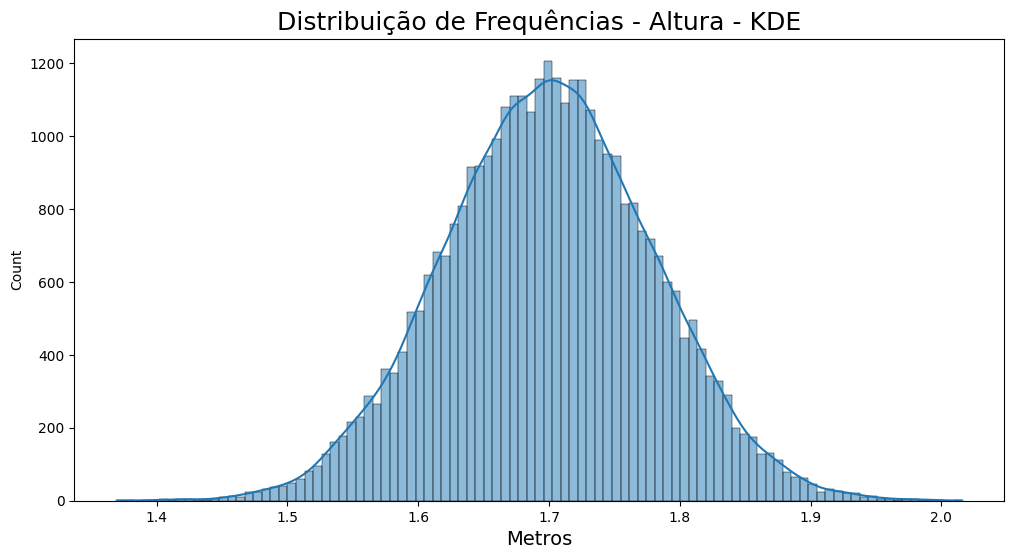

In [53]:
ax = sns.histplot(dados.Altura, kde = True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: >

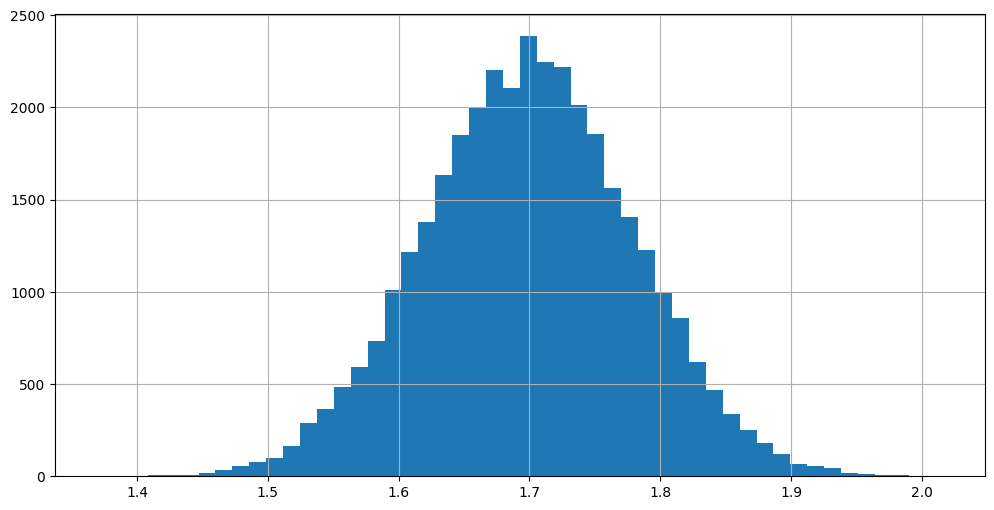

In [54]:
dados.Altura.hist(bins = 50,figsize = (12,6))

In [55]:
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,27040,0.766049
D,5096,0.144371
C,2433,0.068927
B,594,0.016828
A,135,0.003825


<Axes: >

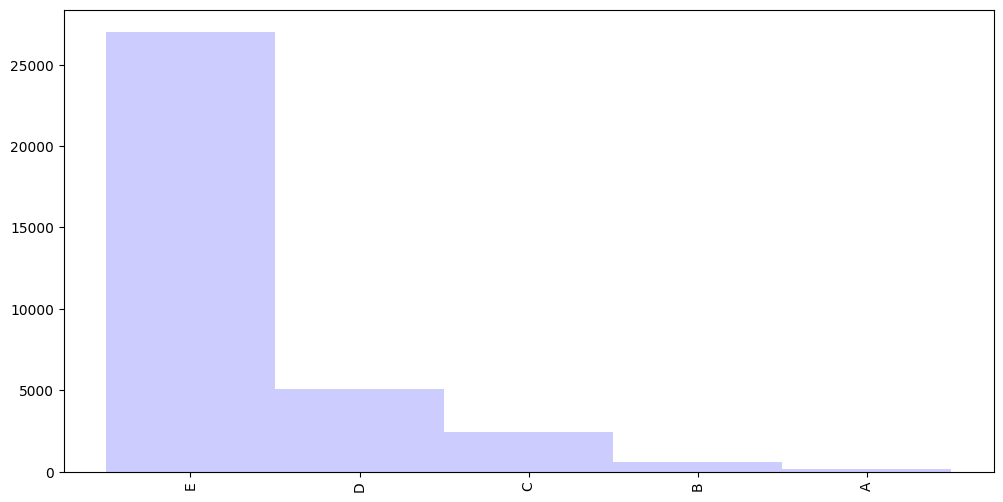

In [56]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width= 1, color= 'blue', alpha = 0.2, figsize= (12, 6))

#Média Aritmética

In [57]:
df = pd.DataFrame (data ={'Matheus':[6,7,9,10,7,4,5],
                          'João':[5,8,9,2,10,6,8],
                          'Fabi':[9,6,10,7,8,4,6]},
index = ['Estatística',
         'Macroeconomia',
         'Contabilidade',
         'Ciencias Sociais',
         'Econometria',
         'Sistemas',
         'Microeconomia'])
df.rename_axis('Matérias',axis = 'columns',inplace = True)
df

Matérias,Matheus,João,Fabi
Estatística,6,5,9
Macroeconomia,7,8,6
Contabilidade,9,9,10
Ciencias Sociais,10,2,7
Econometria,7,10,8
Sistemas,4,6,4
Microeconomia,5,8,6


In [58]:
df['Matheus'].mean()

6.857142857142857

In [59]:
dados.Renda.mean()

1486.3392543486882

In [60]:
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


In [61]:
#renda média por sexo
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    1609.410732
1    1211.665171
Name: Renda, dtype: float64

In [62]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

#Relação entre média, mediana e moda.


<img src ="img004.png">

<ipython-input-63-80678c9f2987>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000').Renda)


<Axes: xlabel='Renda', ylabel='Density'>

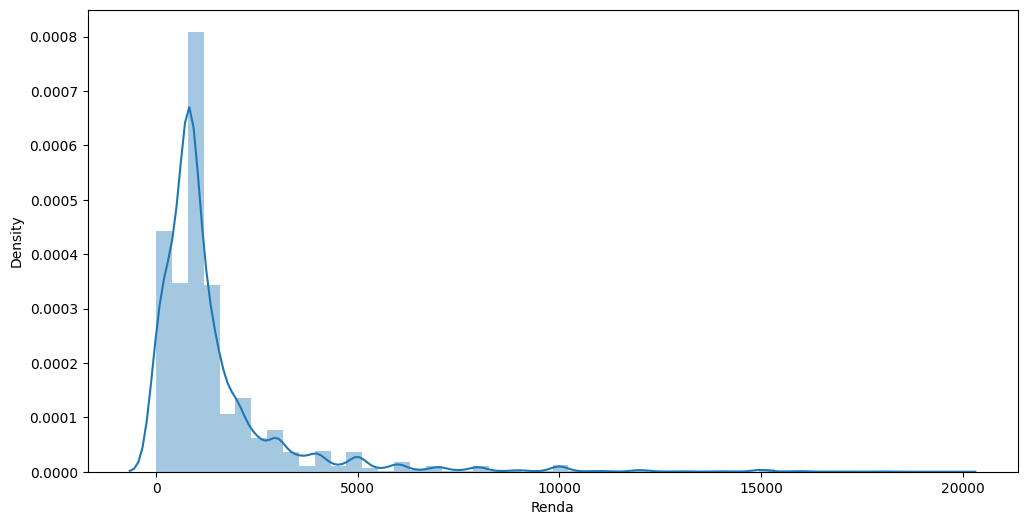

In [63]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax



In [64]:
Moda = dados.Renda.mode()[0]
Moda


788

In [65]:
Mediana = dados.Renda.median()
Mediana


860.0

In [66]:
Media = dados.Renda.mean()
Media


1486.3392543486882

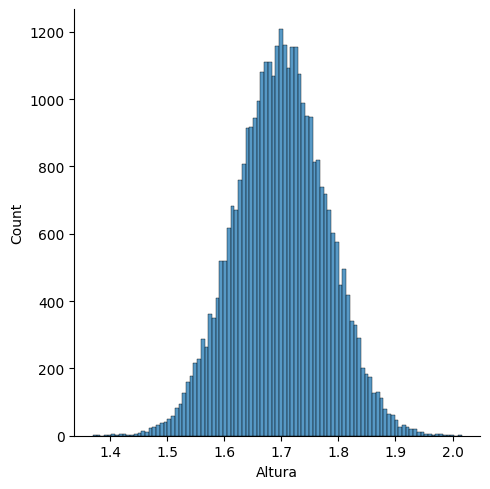

In [67]:
ax = sns.displot(dados.Altura)
sns.set(rc={'figure.figsize':(12,8)})
ax


In [68]:
Moda< Mediana < Media #Assimetria à Direita

True

In [69]:
Moda = dados.Altura.mode()
Moda


0    1.568128
1    1.692977
2    1.796462
Name: Altura, dtype: float64

In [70]:
Mediana = dados.Altura.median()
Mediana


1.699609192

In [71]:
Media = dados.Altura.mean()
Media


1.6995500917363304

## Avalianado anos de estudo

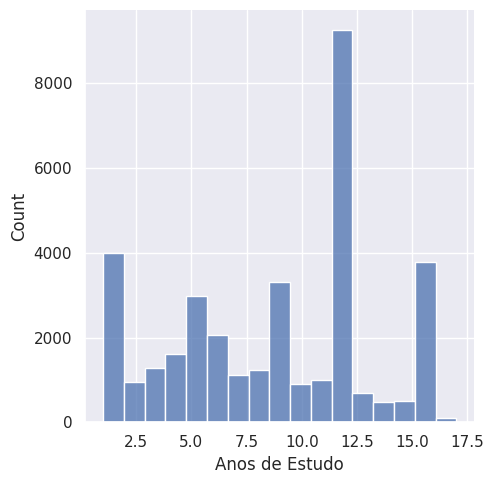

In [72]:
ax = sns.displot(dados['Anos de Estudo'], bins = 17)
sns.set(rc={'figure.figsize':(12,6)})
ax


In [73]:
Moda = dados['Anos de Estudo'].mode()
Moda


0    12
Name: Anos de Estudo, dtype: int64

In [74]:
Mediana = dados['Anos de Estudo'].median()
Mediana


9.0

In [75]:
Media = dados['Anos de Estudo'].mean()
Media



8.7143747521106

In [76]:
12 > Mediana > Media

True

## Medidas Separatrizes

In [77]:
#Quartis
dados.Renda.quantile([0.25,0.5,0.75])

0.25     600.0
0.50     860.0
0.75    1500.0
Name: Renda, dtype: float64

In [78]:
dados.Renda.quantile([i / 10 for i in range(1,10)]) #decis

0.1     200.0
0.2     400.0
0.3     700.0
0.4     788.0
0.5     860.0
0.6    1014.0
0.7    1350.0
0.8    1900.0
0.9    3000.0
Name: Renda, dtype: float64

In [79]:
dados.Renda.quantile([i / 100 for i in range(1,100)]) #percentis


0.01        0.0
0.02        0.0
0.03        0.0
0.04        0.0
0.05        0.0
         ...   
0.95     5000.0
0.96     5000.0
0.97     6000.0
0.98     8000.0
0.99    10000.0
Name: Renda, Length: 99, dtype: float64

In [80]:

import matplotlib as plt

<Axes: title={'center': 'Distribuição de Frequências Acumulada'}, xlabel='Anos', ylabel='Acumulado'>

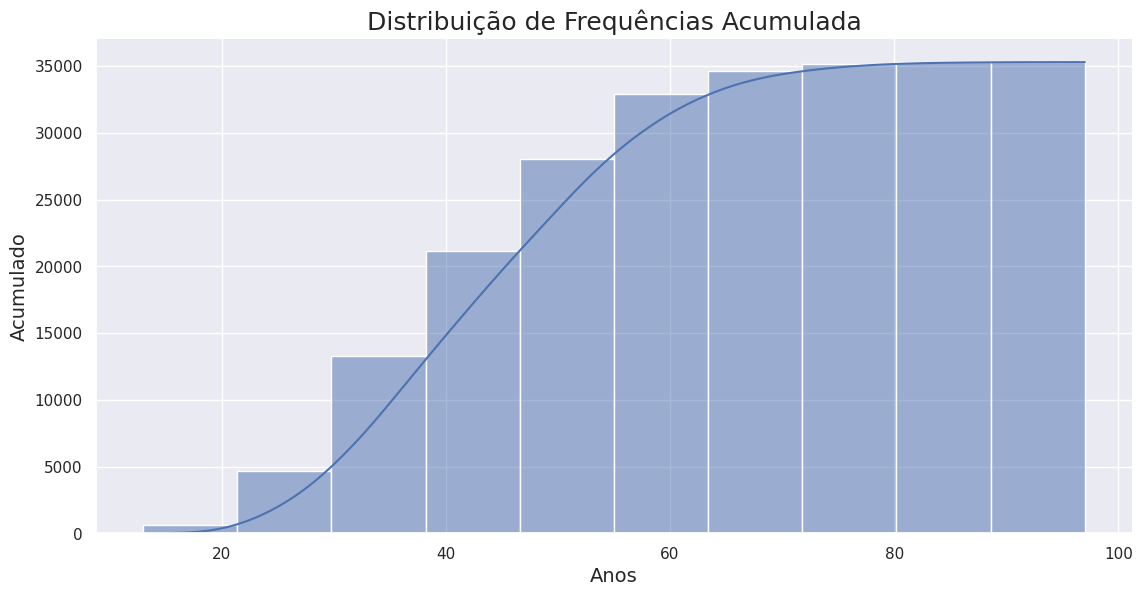

In [81]:
grid = sns.displot(dados.Idade,
                  kde = True,
                  cumulative=True,
                  bins = 10)
ax = grid.ax
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

In [82]:
dados.Idade.quantile([i / 10 for i in range(1, 10)])


0.1    28.0
0.2    32.0
0.3    36.0
0.4    39.0
0.5    43.0
0.6    47.0
0.7    50.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

<Axes: title={'center': 'Distribuição de Frequências Acumulada'}, xlabel='Anos', ylabel='Acumulado'>

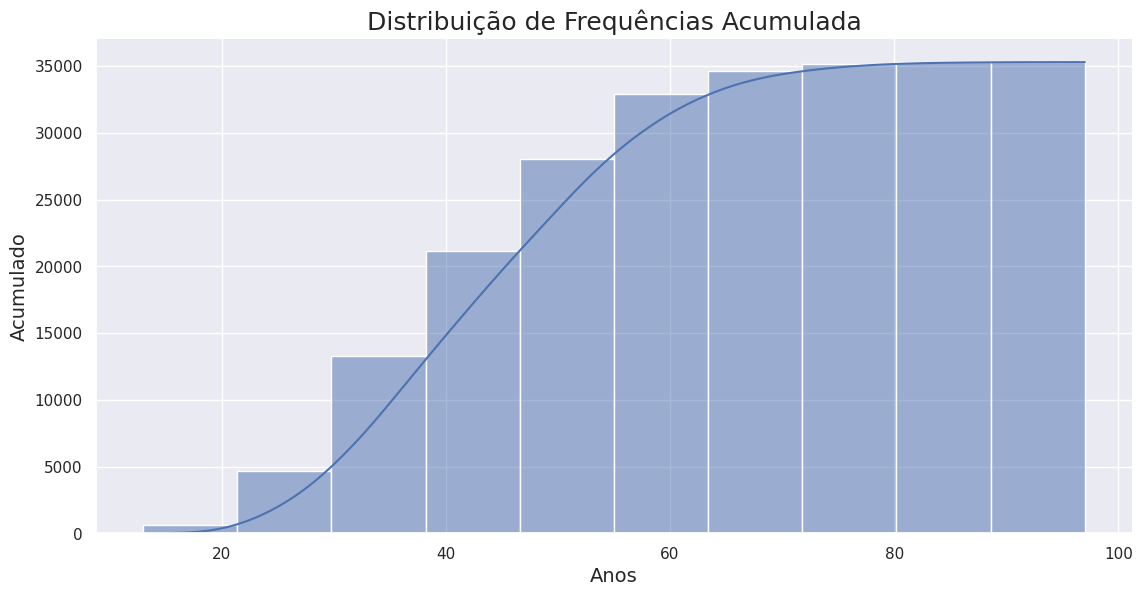

In [83]:
grid = sns.displot(dados.Idade,
                  kde = True,
                  cumulative = True,
                  bins = 10)
ax = grid.ax
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax


## Boxplot de separatrizes

<Axes: title={'center': 'Altura'}, xlabel='Metros'>

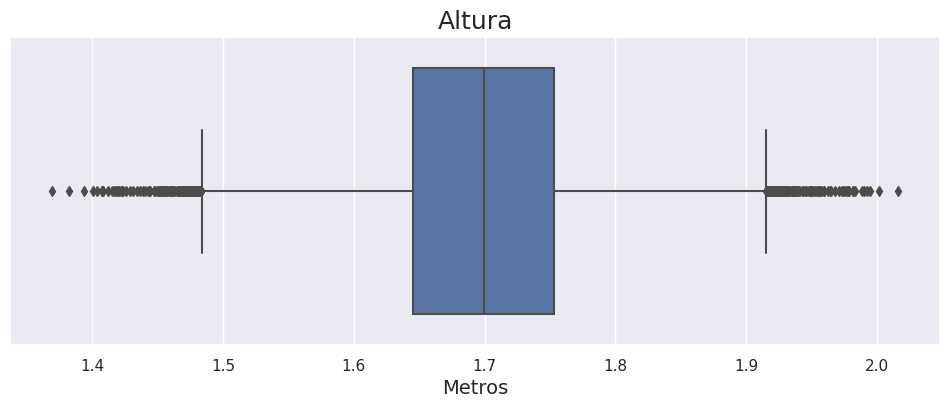

In [84]:
ax = sns.boxplot( x = 'Altura', data = dados, orient = 'h') # h é o parametro para o box plot ficar horizontal
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Altura'}, xlabel='Metros', ylabel='Sexo'>

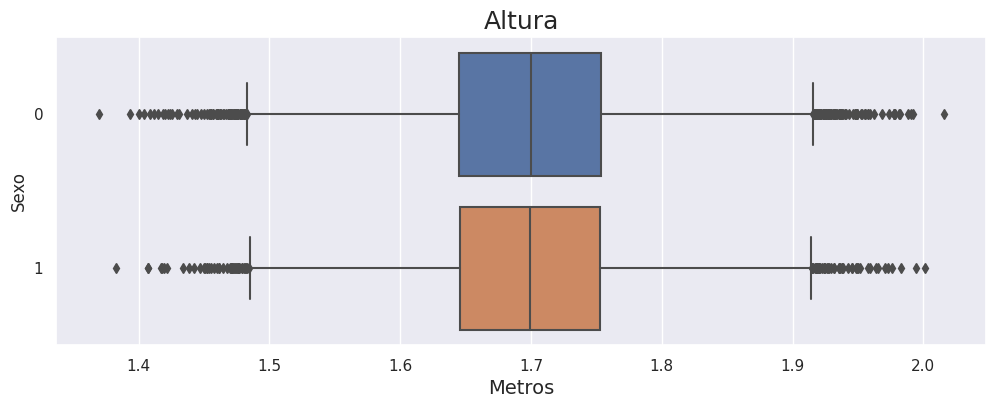

In [86]:
# incluindo a variavel Sexo no eixo y
ax = sns.boxplot( x = 'Altura', y = 'Sexo', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$'>

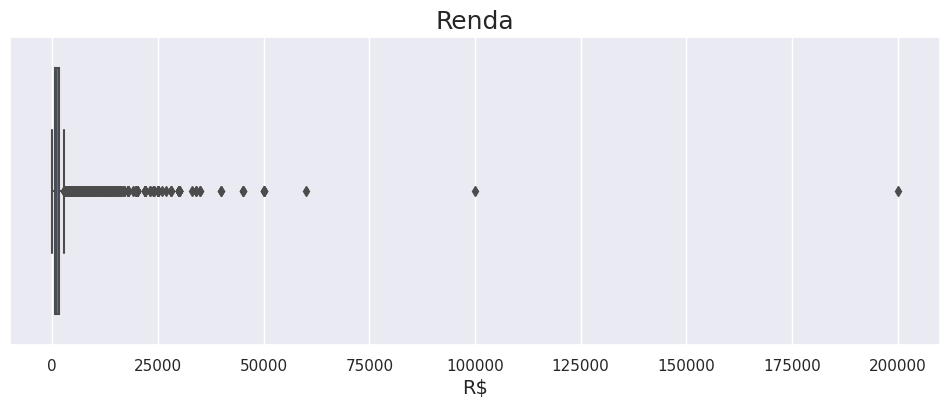

In [87]:
ax = sns.boxplot( x = 'Renda', data = dados, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

In [88]:
# é possivel ver a diferença de renda ali do autiles de 200k

<Axes: title={'center': 'Renda'}, xlabel='R$'>

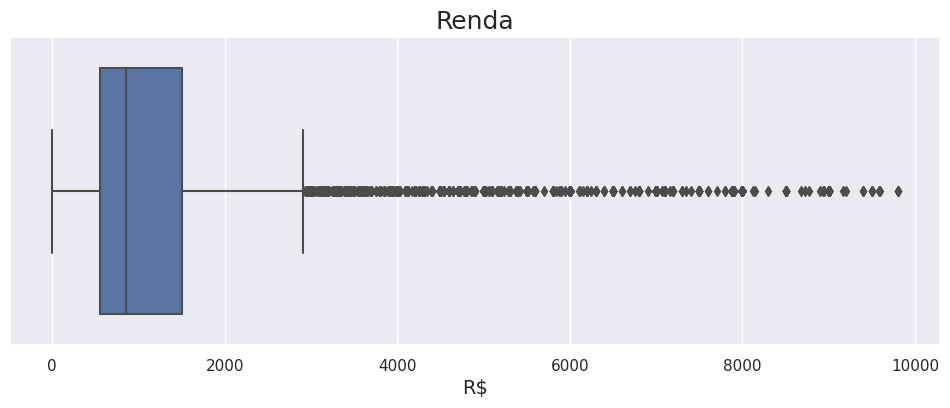

In [90]:
ax = sns.boxplot( x = 'Renda', data = dados.query('Renda <10000'), orient = 'h') # filtramos na query dados de renda menor que 10k
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

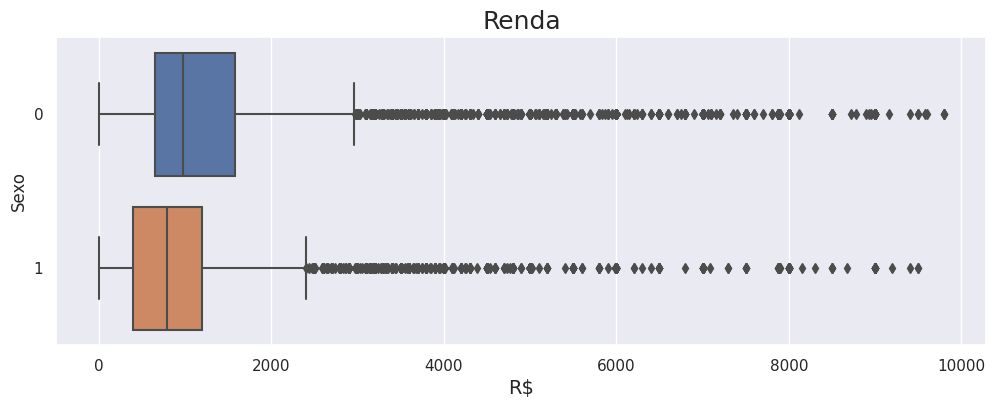

In [91]:
ax = sns.boxplot( x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h') # incluindo sexo no Y
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos'>

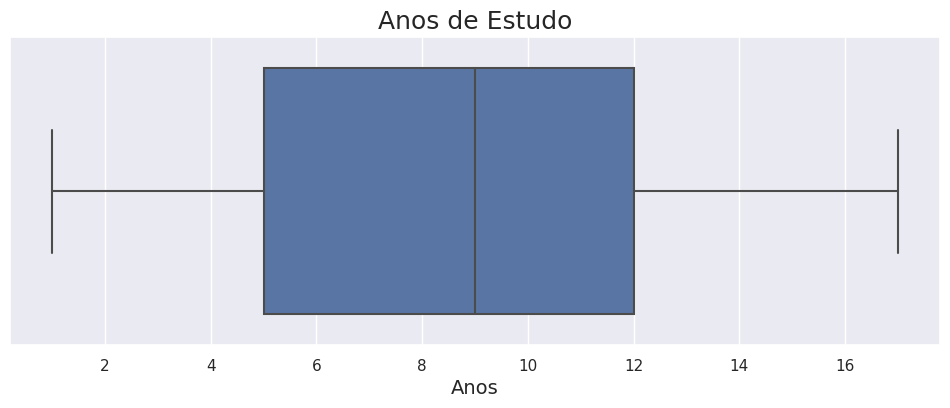

In [92]:
ax = sns.boxplot( x = 'Anos de Estudo', data = dados, orient = 'h') # anos de estudo em geral
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

<Axes: title={'center': 'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

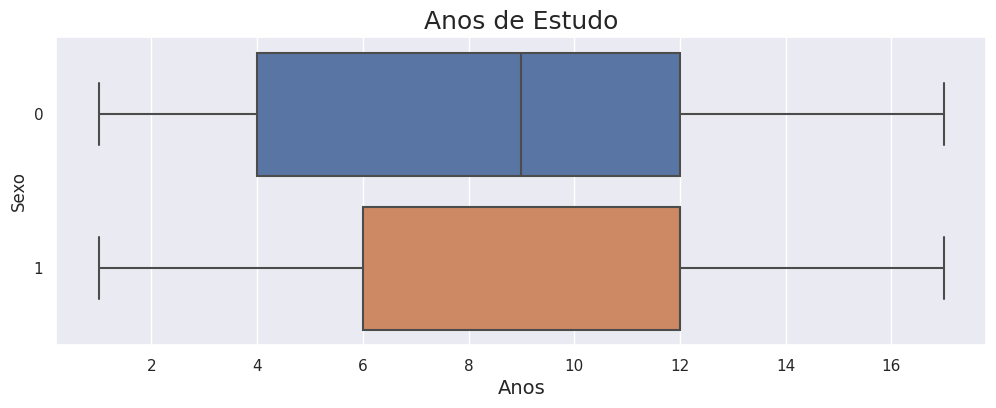

In [95]:
ax = sns.boxplot( x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h') # incluindo no eixo y o Sexo
ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

#Medidas de dispersão

## Desvio médio absoluto

In [97]:
df

Matérias,Matheus,João,Fabi
Estatística,6,5,9
Macroeconomia,7,8,6
Contabilidade,9,9,10
Ciencias Sociais,10,2,7
Econometria,7,10,8
Sistemas,4,6,4
Microeconomia,5,8,6


In [101]:
df.mean() # as medidas de tendecia centraal não conseguem explicar todo o comportamento

Matérias
Matheus    6.857143
João       6.857143
Fabi       7.142857
dtype: float64

In [100]:
df.median()

Matérias
Matheus    7.0
João       8.0
Fabi       7.0
dtype: float64

In [103]:
notas_matheus = df[['Matheus']] # 2 colchetes para ser um df, nãao um series
notas_matheus

Matérias,Matheus
Estatística,6
Macroeconomia,7
Contabilidade,9
Ciencias Sociais,10
Econometria,7
Sistemas,4
Microeconomia,5


In [106]:
nota_media_matheus = notas_matheus.mean()[0] # se não colocar o indice 0, retorno é uma series
nota_media_matheus

6.857142857142857

In [109]:
notas_matheus['Desvio'] = notas_matheus['Matheus'] - nota_media_matheus #criando colna de Desvio
notas_matheus
#não queremos valores negativos, vamos usar absolutos

<ipython-input-109-bf92d52a3c3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notas_matheus['Desvio'] = notas_matheus['Matheus'] - nota_media_matheus #criando colna de Desvio


Matérias,Matheus,Desvio
Estatística,6,-0.857143
Macroeconomia,7,0.142857
Contabilidade,9,2.142857
Ciencias Sociais,10,3.142857
Econometria,7,0.142857
Sistemas,4,-2.857143
Microeconomia,5,-1.857143


In [111]:
notas_matheus['Desvio'].sum() #próximo a 0

2.6645352591003757e-15

In [115]:
notas_matheus['|Desvio|'] = notas_matheus['Desvio'].abs()
notas_matheus

Matérias,Matheus,Desvio,|Desvio|
Estatística,6,-0.857143,0.857143
Macroeconomia,7,0.142857,0.142857
Contabilidade,9,2.142857,2.142857
Ciencias Sociais,10,3.142857,3.142857
Econometria,7,0.142857,0.142857
Sistemas,4,-2.857143,2.857143
Microeconomia,5,-1.857143,1.857143


<Axes: >

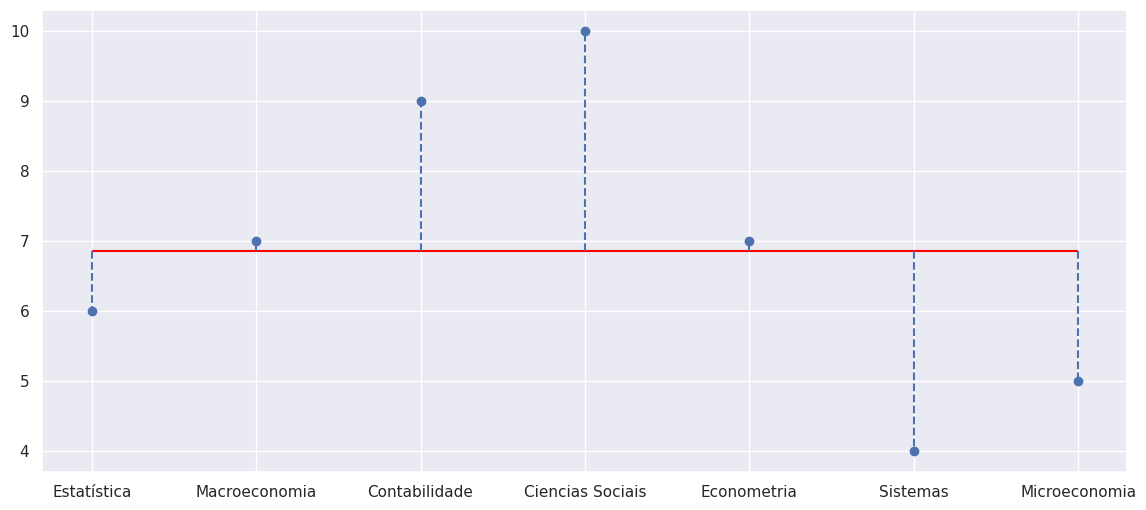

In [118]:
ax = notas_matheus['Matheus'].plot(style = 'o')
ax.figure.set_size_inches(14, 6)
ax.hlines(y = nota_media_matheus, xmin = 0, xmax = notas_matheus.shape[0] - 1, colors = 'red')
for i in range(notas_matheus.shape[0]):
    ax.vlines(x = i, ymin = nota_media_matheus, ymax = notas_matheus['Matheus'][i], linestyle='dashed')
ax

In [119]:
notas_matheus['|Desvio|'].mean()

1.5918367346938775

In [123]:
desvio_medio_absoluto = notas_matheus['Matheus'].mad() # aqui é o comando para descobrir direto o Desvio Padrão
desvio_medio_absoluto

<ipython-input-123-891228cbbca3>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_medio_absoluto = notas_matheus['Matheus'].mad() # aqui é o comando para descobrir direto o Desvio Padrão


1.5918367346938775

## Variância

In [128]:
#Ficar de olho na diferença entre Variância Populacional e Variância Amostral

In [130]:
notas_matheus['Desvio^2'] = notas_matheus['Desvio'].pow(2)
notas_matheus

Matérias,Matheus,Desvio,|Desvio|,Desvio^2
Estatística,6,-0.857143,0.857143,0.734694
Macroeconomia,7,0.142857,0.142857,0.020408
Contabilidade,9,2.142857,2.142857,4.591837
Ciencias Sociais,10,3.142857,3.142857,9.877551
Econometria,7,0.142857,0.142857,0.020408
Sistemas,4,-2.857143,2.857143,8.163265
Microeconomia,5,-1.857143,1.857143,3.448980


In [131]:
notas_matheus['Desvio^2'] .sum() / (len(notas_matheus)-1)

4.476190476190476

In [133]:
variancia = notas_matheus['Matheus'].var()
variancia

4.476190476190476

## Desvio Padrão

In [134]:
np.sqrt(variancia)

2.1157009420498154

In [137]:
desvio_padrao = notas_matheus['Matheus'].std()
desvio_padrao

2.1157009420498154

In [138]:
df.std()

Matérias
Fulano     2.138090
Sicrano    0.566947
dtype: float64

## exercicio

In [140]:
dataset = pd.DataFrame({
    'Sexo': ['H', 'M', 'M', 'M', 'M', 'H', 'H', 'H', 'M', 'M'],
    'Idade': [53, 72, 54, 27, 30, 40, 58, 32, 44, 51]
})

In [141]:
dataset.std()

<ipython-input-141-d926424df4d9>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.std()


Idade    14.18489
dtype: float64

In [144]:
dataset.groupby(['Sexo']).std().loc['M']

Idade    16.64532
Name: M, dtype: float64